data_0


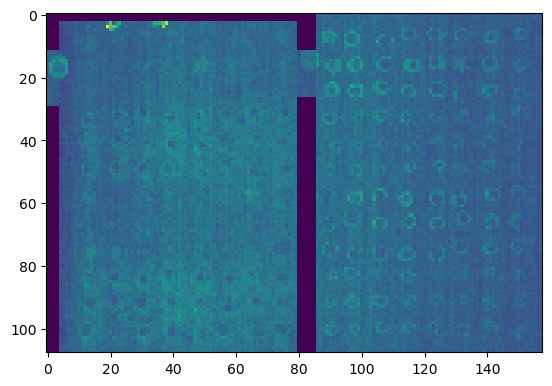

In [3]:
import sys
sys.path.insert(0, '/Users/bpb/repos/BASTet_py3')
from omsi.dataformat.omsi_file import *

def get_image(my_file='/Users/bpb/Downloads/20250131_ZD_PlateA.h5',min_mz=650,max_mz=700,
                my_experiment=0,
                my_data_index=0,
                my_slice=None):
    f = omsi_file(my_file, 'r' )
    #Get the number of experiments
    # num_exp = f.get_num_experiments()
    # print(num_exp)
    #Get the first experiment. 
    #exp0  is an object of the type omsi_file_experiment For more information execute:
    #help( omsi_file_experiment )
    exp = f.get_experiment(my_experiment)
    # info = exp0.get_instrument_info()
    # print(info)
    # p = f.get_experiment_path(0)
    # print(p)
    d = exp.get_msidata(data_index=my_data_index)
    mzdata = exp.get_instrument_info().get_instrument_mz()    
    mzdata = mzdata[:]
    idx_lo = np.argmin(np.abs(mzdata-min_mz))
    idx_hi = np.argmin(np.abs(mzdata-max_mz))
    my_slice = d[:,:,idx_lo:idx_hi].sum(axis=2)
    f.close_file()
    return my_slice

my_image = get_image()
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.imshow(my_image, interpolation='nearest')

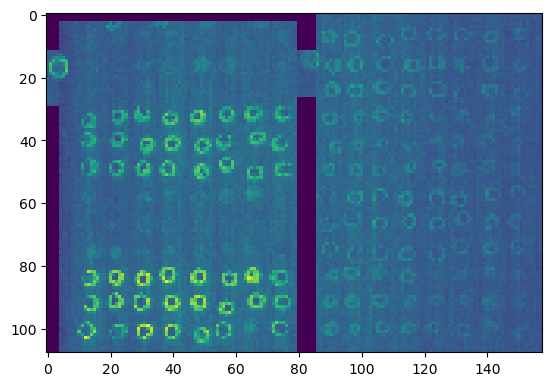

In [4]:
exp0(0).format_name

TypeError: 'omsi_file_experiment' object is not callable

In [ ]:
omsi_format_msidata.data_groupname

In [3]:
omsi_file_msidata(exp0['data_0'],
                  fill_space=True,
                  fill_spectra=True,
                  preload_mz=True,
                  preload_xy_index=True)

KeyError: "Unable to open object (object 'shape' doesn't exist)"

In [ ]:
my_file = '/Users/bpb/Downloads/20250131_ZD_PlateA.h5'
f = omsi_file(my_file, 'r' )
#Get the number of experiments
num_exp = f.get_num_experiments()
#Get the first experiment. 
#exp0  is an object of the type omsi_file_experiment For more information execute:
#help( omsi_file_experiment )
exp0 = f.get_experiment(0)
#Get the number of available datasets and analyses
num_dat = exp0.get_num_msidata()
num_ana = exp0.get_num_analysis()
print('Number of datasets: ' + str(num_dat))
print('Number of analyses: ' + str(num_ana))
#Get the first dataset
#d0 is an object of the type omsi_file_msidata For more information execute:
#help( omsi_file_msidata )

#Get the experiment and dataset
# exp = f.get_experiment(0)
# data = msidata[:]
data = exp0.get_msidata(0)
# image = data.max(axis=2)
# print(image.shape)
# mzdata = exp.get_instrument_info().get_instrument_mz()    
# print(mzdata)
f.close_file()


In [ ]:
f.close_file()

In [ ]:
d = exp0.get_msidata(0)
#Number of pixel in x, y , m/z
numX  = d.shape[0]
numY  = d.shape[1]
numMZ = d.shape[2]
print('Number of pixels in x: ' + str(numX))
print('Number of pixels in y: ' + str(numY))
print('Number of m/z values: ' + str(numMZ))

In [ ]:
#Get the raw MSI dataset, i.e., the API object that manages the dataset
#We can slice into d using standard array syntax. The MSI dataset defines
#a 3D cube in (x,y,m/z) and contains the corresponding intensity values.
#The m/z values are the same for each spectrum and are stored in a 
#separate 1D array. In the call below we get the experiment with index 0
#and the msi dataset with index 0 associated with the experiment. An
#OpenMSI file may contain multipe experiments, each of which may have
#multiple MSI datasets associated with it. For now, all data you have.
#d is an object of the type omsi_file_msidata. For more information execute:
#help( omsi_file_msidata )
d = exp0.get_msidata(0)
#Number of pixel in x, y , m/z
numX  = d.shape[0]
numY  = d.shape[1]
numMZ = d.shape[2]
#Get the m/z data. This is a 1D array of length d.shape[2]
mz = d.mz
#Load the 10th ion image
image10 = d[:,:,10]
#Load spectrum of pixel (2,3) 
spectrum_2_3 = d[2,3,:]
